![Alt](https://i.ytimg.com/vi/-mqs0ra8O2U/maxresdefault.jpg)

# Preface
Data size is not so big, but it is normally what macroeconomy data looks like, hope I can generate some insight from it.<br>

Inro of each topic:
* Remove null data
* Convert date format to Year-Month-Day
* Line Chart in "seaborn"
* Line chart in plotly
* Stories during 2008 financial crisis

Import needed parckage, and see what we have in each folder.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Remove null data
First, I would like to check the first 5 rows and the last 5 rows, but I only saw null for those raws. It makes me suspecting that is there only null data regarding federal fund rate in this data set?

In [2]:
data = pd.read_csv('./index.csv').fillna(method='ffill')
data.head()

,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
0,1954,7,1,NaN,NaN,NaN,0.80,4.6,5.8,NaN
1,1954,8,1,NaN,NaN,NaN,1.22,4.6,6.0,NaN
2,1954,9,1,NaN,NaN,NaN,1.06,4.6,6.1,NaN
3,1954,10,1,NaN,NaN,NaN,0.85,8.0,5.7,NaN
4,1954,11,1,NaN,NaN,NaN,0.83,8.0,5.3,NaN


In [3]:
data.tail()

,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
899,2016,12,14,1.0,0.75,0.50,0.54,1.9,4.7,2.2
900,2017,1,1,1.0,0.75,0.50,0.65,1.9,4.8,2.3
901,2017,2,1,1.0,0.75,0.50,0.66,1.9,4.7,2.2
902,2017,3,1,1.0,0.75,0.50,0.66,1.9,4.7,2.2
903,2017,3,16,1.0,1.00,0.75,0.66,1.9,4.7,2.2


Then I make a hist plot, and I found the plot works well,it proves that there is data in this column(FFIR column). So I guess I need to remove the rows with null federal fund rate, if my target is to analyse the fedral fund interest rate.

<AxesSubplot:ylabel='Frequency'>

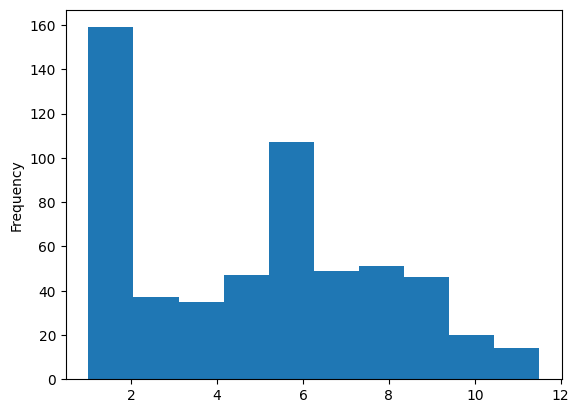

In [4]:
data['Federal Funds Target Rate'].plot.hist()

Let's do this

In [5]:
from numpy import nan as NA
data_rm_lit = data.iloc[:,:4]
data_rmna = data_rm_lit.dropna()

In [6]:
data_rmna.head()
data_rmna.tail()

,Year,Month,Day,Federal Funds Target Rate
899,2016,12,14,1.0
900,2017,1,1,1.0
901,2017,2,1,1.0
902,2017,3,1,1.0
903,2017,3,16,1.0


OK, after above process, null data has been removed from the data set.

# Convert date format to Year-Month-Day
In order to visulize a trend of the interest rate data, I'd better to make the time data available for visualization

In [7]:
data_rmna['Date'] = data_rmna['Year'].map(str)+"/"+data_rmna['Month'].map(str)+"/"+data_rmna['Day'].map(str)
data_rmna.head()

/var/folders/10/5zg8wh6s3415f5fmtc673by80000gn/T/ipykernel_19308/1353150343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rmna['Date'] = data_rmna['Year'].map(str)+"/"+data_rmna['Month'].map(str)+"/"+data_rmna['Day'].map(str)


,Year,Month,Day,Federal Funds Target Rate,Date
339,1982,9,27,10.25,1982/9/27
340,1982,10,1,10.00,1982/10/1
341,1982,10,7,9.50,1982/10/7
342,1982,11,1,9.50,1982/11/1
343,1982,11,19,9.00,1982/11/19


Seems it works well, now I have a column that is in the date format.

# Line Chart in "seaborn"
Draw a line chart to see what is the trend of the Fed interest rate is.

<AxesSubplot:xlabel='Date', ylabel='Federal Funds Target Rate'>

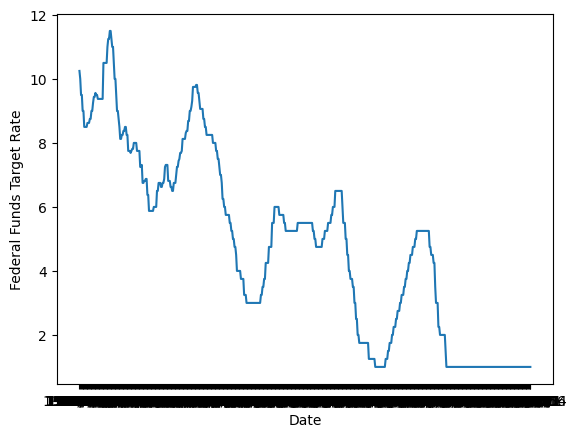

In [8]:
import seaborn as sns

sns.lineplot(x='Date',y='Federal Funds Target Rate',data=data_rmna)

# Line chart in plotly

In [10]:
import plotly.express as px

fig = px.line(data_rmna, x="Date", y="Federal Funds Target Rate", title='Federal Funds Target Rate Trend')
fig.show()

# Federal Funds Target Rate Vs. Unemployment Rate
Then let's have a look on how FF rate, unemployment rate, inflation rate work with each other.

<AxesSubplot:xlabel='Date'>

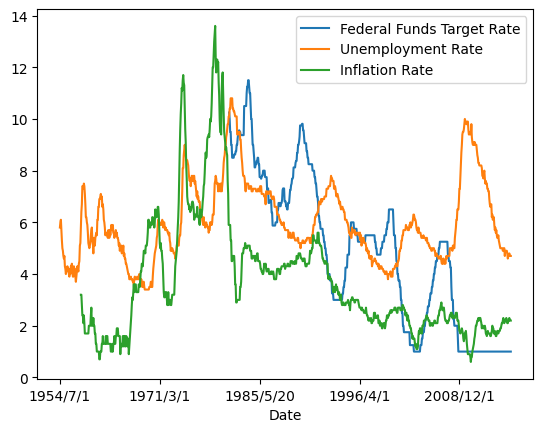

In [11]:
data['Date'] = data['Year'].map(str)+"/"+data['Month'].map(str)+"/"+data['Day'].map(str)
data_index = data.set_index("Date")
data_kept = data_index[['Federal Funds Target Rate','Unemployment Rate','Inflation Rate']]
data_kept.plot()

# Conclusion on the chart
Though it is not that clear, but we can still find some basic but interesting relationship:
* Federal funds target rate & unemployment rate has a positive relation, so roughly speaking, lower interest rate can lower unemployment rate.
* Federal funds target rate & inflation rate has a negtive relation, lower interest rate can increase inflation

# Financial Crisis 2008
For people who worked in financial sectors, financial crisis started long before 2008, while for the public, it started on March 16 2008, when Bear Stearns, a 85 years old investment bank sold to JP Morgan at 2$ per share.<br>
Let's look at what is the data looks like during that period. Let's specifically focus on 2007 and onwards data

In [12]:
import plotly

data_index_2007 = data[data.Year>=2007]
data_index_2007 = data_index_2007[data_index_2007.Year<=2009]
data_index_2007 = data_index_2007.set_index("Date")
data_kept_2007 = data_index_2007[['Federal Funds Target Rate','Unemployment Rate','Inflation Rate']]

fig = px.line(data_kept_2007,title='Macro data during financial crisis')
fig.show()

If you hover your mouse to March 18 2008, it shows the Federal Funds Target Rate is 2.25, which is really low, and it is going to be lower with the collapse of the next company - **Lehman Brothers**